In [ ]:
import numpy as np
import cv2 as cv
import ipympl
from matplotlib import pyplot as plt

Ejercicio 1: Transformaciones lineales de una imagen Conociendo la ecuacion general de una transformacion lineal:

s = ar + c

con r: valor de entrada, a: factor de ganancia y c: offset, realice los siguientes ejercicios:

- Implemente una LUT del mapeo entre la entrada y la salida.
- Pruebe la rutina con diferentes juegos de coeficientes a y c, sobre diversas im´agenes, y muestre en una misma ventana la imagen original, el mapeo aplicado y la imagen obtenida.
- Implemente el negativo de la imagen de entrada.
- Genere diversas LUT con estiramientos y compresiones lineales por tramos de la entrada, y pruebe los resultados sobre diversas imagenes.
- (Opcional): genere una imagen binaria de 256x256 que simule los ejes cartesianos de la transformacion r − s, marcando la lınea identidad. Capture dos puntos que marquen el final de los segmentos, y genere la LUT con una transformacion que parta del origen, pase por los puntos marcados, y finalice en el punto (256,256). Pruebe la rutina con diversas imagenes. Recomendacion: utilizar matplotlib (https://matplotlib.org/) con subplots, y para manejos de eventos, ver: https://matplotlib.org/users/ event_handling.html

In [ ]:
def lut(tramo,a,c):
    r = np.arange(tramo[0],tramo[1],1)
    s=np.multiply(r,a)+c
    s=np.where(s>255,255,s)
    s=np.where(s<0,0,s)
    return s

def lut_tramos(tramos):
    s=np.arange(256)
    for i in tramos:
        s[i[0]:i[1]]=lut(i[0:2],i[2],i[3])
    return s   

In [ ]:
img = cv.imread('imagenes/clown.jpg',cv.IMREAD_GRAYSCALE)
img2 = img.copy()
mapeo =  lut([0,256],-1,255)
img2[:] = mapeo[img[:]]


In [ ]:
%matplotlib widget
fig1,ax1 = plt.subplots(1,3,figsize=(6,6))
ax1[0].imshow(img,cmap="gray",vmin=0,vmax=255)
ax1[1].imshow(img2,cmap="gray",vmin=0,vmax=255)
ax1[2].plot(mapeo)
plt.show()

In [ ]:
plt.close()
plt.figure(3)
mapeo3 = lut_tramos([[0,128,-1,255]])
img3 = img.copy()
img3[:] = mapeo3[img[:]]
plt.imshow(img3,cmap="gray",vmin=0,vmax=255)
plt.show()

Ejercicio 2: Transformaciones no lineales


1. Implemente la transformacion logarıtmica s = log(1 + r) y la transformacion
de potencia s = r
γ
(c=1).
2. Realice el procesado sobre la imagen ’rmn.jpg’, utilizando los dos procesos
por separado.

In [ ]:
def trans_log():
    c=255/np.log10(1+255)
    r = np.arange(256)
    s = c*np.log10(1+r)
    return s
    
def trans_potencia(gamma):
    r = np.arange(256)/255
    s = pow(r,gamma)
    return s*255



In [ ]:
img_rmn = cv.imread('imagenes/rmn.jpg',cv.IMREAD_GRAYSCALE)

mapeo_log = trans_log()
mapeo_potencia = trans_potencia(4)

img_log = img_rmn.copy()
img_log[:] = mapeo_log[img_rmn[:]]

img_potencia = img_rmn.copy()
img_potencia[:] = mapeo_potencia[img_rmn[:]]
#

In [ ]:
fig4,ax4 = plt.subplots(2,3,figsize=(6,6))
ax4[0,0].imshow(img_rmn,cmap="gray",vmin=0,vmax=255)
ax4[0,1].imshow(img_log,cmap="gray",vmin=0,vmax=255)
ax4[0,2].imshow(img_potencia,cmap="gray",vmin=0,vmax=255)
ax4[1,0].plot(np.arange(256))
ax4[1,1].plot(np.arange(256))
ax4[1,2].plot(mapeo_potencia)
ax4[1,2].plot(np.arange(256))
plt.show()
ax4[1,1].plot(mapeo_log)

Ejercicio 3: Operaciones aritmeticas
1. Implemente una funcion que realice las siguientes operaciones aritmeticas
sobre dos imagenes que sean pasadas como parametros:

*   a) Suma. Normalice el resultado por el numero de imagenes.
*   b) Diferencia. Aplique las dos funciones de reescalado usadas tıpicamente
para evitar el desborde de rango (sumar 255 y dividir por 2, o restar el
mınimo y escalar a 255).
*   c) Multiplicacion. En esta operaci´on la segunda imagen debera ser una
mascara binaria, muy utilizada para la extraccion de la region de interes
(ROI) de una imagen.
2. A partir de un video (pedestrians.mp4) de una camara de seguridad, debe
obtener solamente el fondo de la imagen. Incorpore un elemento TrackBar
que le permita ir eligiendo el numero de frames a promediar para observar
los resultados instantaneamente.
* import numpy as np
* import cv2
* cap = cv2.VideoCapture(‘‘pedestrians.mp4’’)
* while(cap.isOpened()):
* * ret, frame = cap.read()


CVUI: https://dovyski.github.io/cvui/ y https://dovyski.github.io/cvui/
examples/
Trackbar OpenCV: https://docs.opencv.org/3.4/da/d6a/tutorial_trackbar.
html
Blending: https://docs.opencv.org/3.4/d5/dc4/tutorial_adding_images.html

In [ ]:
def diferencia(img1,img2):
    img_out= img1-img2
    img_out[:]=  img_out[:]+255/2
    return img_out

def suma(vec_img,type='gray'):
    if type=='gray':
        img_out = vec_img.sum(axis=0)
        img_out[:] = img_out[:]/vec_img.shape[0]
    else:
        img_out = vec_img[:].sum(axis=0)
        img_out[:] = img_out[:]/vec_img[:].shape[0]
    return img_out

def multiplicacion(img,bin):
    img_out = np.multiply(img,bin)
    return img_out


In [ ]:
(576, 768, 3)
a= np.ones((576, 768, 3))
b= np.zeros((576, 768, 3))
c = [a,b]
print(suma(np.array(c),'rgb'))


In [ ]:
print(img.shape)
alt=np.ones((256,256))*0
img_resta = diferencia(alt,img)
img_suma = suma(np.array([alt,img]))
alt[100:200,100:200] = 1
img_mult = multiplicacion(img,alt)
plt.close()
fig5,ax5 = plt.subplots(2,2)
ax5[0,1].imshow(img_resta,cmap="gray",vmin=0,vmax=255)
ax5[1,0].imshow(img_suma,cmap="gray",vmin=0,vmax=255)
ax5[1,1].imshow(img_mult,cmap="gray",vmin=0,vmax=255)
plt.show()

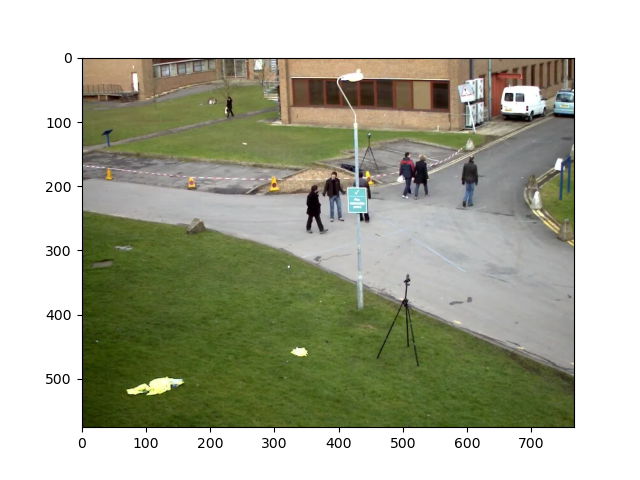

In [17]:
cap = cv.VideoCapture('imagenes/pedestrians.mp4')
rt,fr=cap.read()
plt.close()
plt.figure(6)
plt.imshow(fr[:,:,[2,1,0]])
plt.show()
count=0
while(cap.isOpened()):
    ret,frame = cap.read() 
    count+=1
    if not ret: 
        break  
    fr=cv.add(fr,frame)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


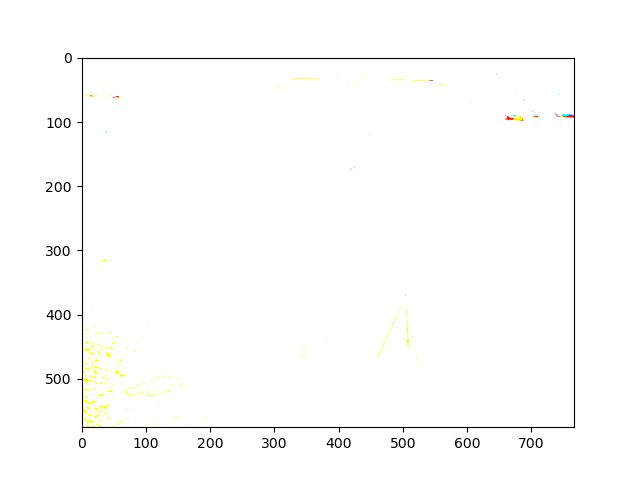

In [18]:
final_img=np.round(fr[:,:,[2,1,0]]/count)
plt.close()
plt.figure(7)
plt.imshow(final_img)
plt.show()

In [19]:
print(count)

100


1. Utilizando las t´ecnicas aprendidas, descubra que objetos no est´an perceptibles
en la imagen earth.bmp y realce la imagen de forma que los objetos se vuelvan
visibles con buen contraste sin realizar modificaciones sustanciales en el resto
de la imagen

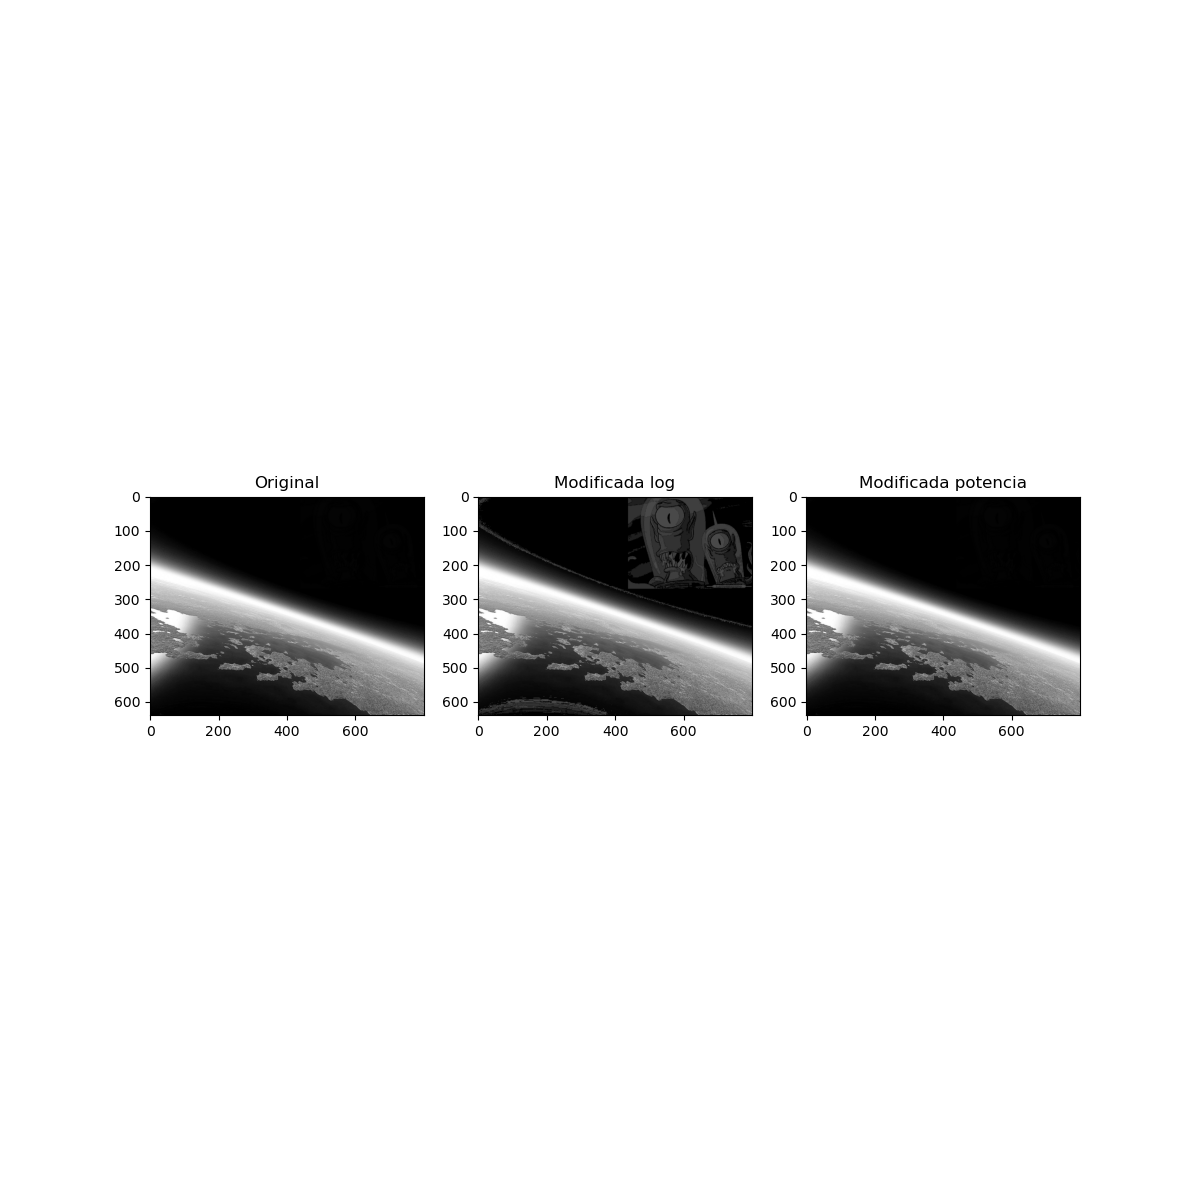

In [73]:
imagen_earth = cv.imread('imagenes/earth.bmp',cv.IMREAD_GRAYSCALE)

mapeo_log = trans_log()
mapeo_potencia = trans_potencia(4)

img_log_earth = imagen_earth.copy()
mapeo_log[5:256]=np.arange(5,256)
img_log_earth[:] = mapeo_log[imagen_earth[:]]


img_potencia_earth = img_log_earth.copy()
img_potencia_earth[:] = mapeo_potencia[img_log_earth[:]]


plt.close()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,12)) 
ax[0].imshow(imagen_earth,cmap="gray",vmin=0,vmax=255)
ax[0].set_title("Original")
ax[1].imshow(img_log_earth,cmap="gray",vmin=0,vmax=255) 
ax[1].set_title("Modificada log")
ax[2].imshow(img_lineal_earth,cmap="gray",vmin=0,vmax=255) 
ax[2].set_title("Modificada potencia")
plt.show()

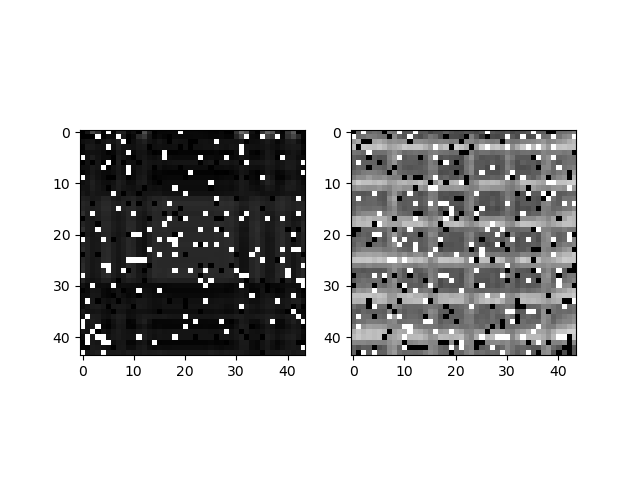

38.56353305785124 124.27376033057851


In [113]:
plt.close()
plt.figure(10)
proc_x = cv.imread('imagenes/a7v600-XRImpulsivo.tiff',cv.IMREAD_GRAYSCALE)
proc_se = cv.imread('imagenes/a7v600-SERImpulsivo.tiff',cv.IMREAD_GRAYSCALE)
proc_x = proc_x[103:147,198:242]
proc_se = proc_se[103:147,198:242]
fig,ax = plt.subplots(1,2)
ax[0].imshow(proc_x,cmap="gray",vmin=0,vmax=255) 
ax[1].imshow(proc_se,cmap="gray",vmin=0,vmax=255) 
plt.show()

print(np.mean(proc_x),np.mean(proc_se))

In [154]:
def manual_filter(img):
    coord = np.ones((2,5))
    for i in np.arange(5):
        for j in np.arange(2):
           if img[j*50+50,i*50+50]<50:
               print(f'la posicion col= {i+1} fila = {j+1} esta vacia')
               coord[j,i] = 0
    return coord
               

34 172
la posicion col= 3 fila = 2 esta vacia


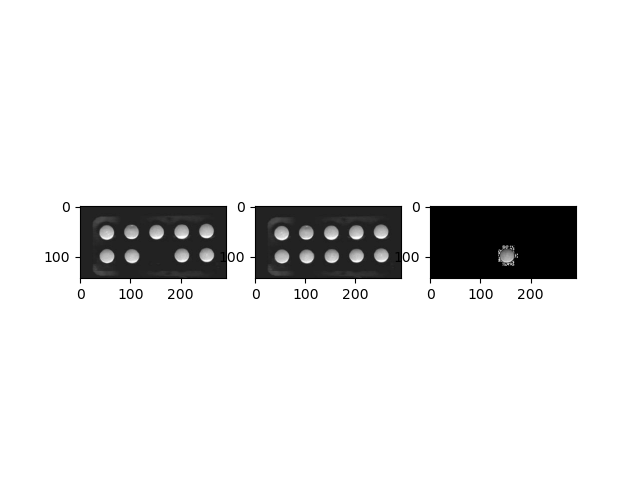

In [157]:
plt.close()
plt.figure(11)
bliz_incompleto = cv.imread('imagenes/blister_incompleto.jpg',cv.IMREAD_GRAYSCALE)
bliz_completo = cv.imread('imagenes/blister_completo.jpg',cv.IMREAD_GRAYSCALE)
img_filter = bliz_completo[:,0:291]-bliz_incompleto

print(bliz_incompleto[96,151],bliz_completo[96,151])

coord = manual_filter(bliz_completo)
coord2 = manual_filter(bliz_incompleto)


fig,ax = plt.subplots(1,3)
ax[0].imshow(bliz_incompleto,cmap="gray",vmin=0,vmax=255) 
ax[1].imshow(bliz_completo,cmap="gray",vmin=0,vmax=255) 
ax[2].imshow(img_filter,cmap="gray",vmin=0,vmax=255) 
plt.show()

In [160]:
(thresh, im_bw) = cv.threshold(img, 128, 255, cv.THRESH_BINARY)
print(im_bw)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
